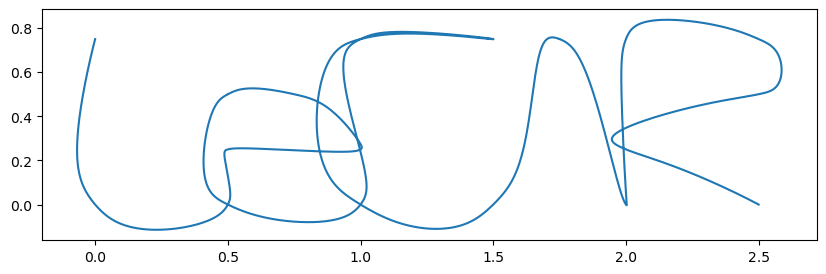

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#from poly coeff to get traj

# Load data
data = np.loadtxt('LeCAR_poly.csv', delimiter=',', skiprows=1)
# Duration,x^0,x^1,x^2,x^3,x^4,x^5,x^6,x^7,y^0,y^1,y^2,y^3,y^4,y^5,y^6,y^7,z^0,z^1,z^2,z^3,z^4,z^5,z^6,z^7,yaw^0,yaw^1,yaw^2,yaw^3,yaw^4,yaw^5,yaw^6,yaw^7

duration = data[:,0]
x = np.flip(data[:,1:9], axis=1)
y = np.flip(data[:,9:17], axis=1)
z = np.flip(data[:,17:25], axis=1)


traj = []

for i in range(len(duration)):
    T = duration[i]
    N = int(T/0.02)
    # print(T, N)
    t = np.linspace(0, duration[i], N)
    x_eval = np.polyval(x[i,:], t)
    y_eval = np.polyval(y[i,:], t)
    z_eval = np.polyval(z[i,:], t)
    
    traj.append(np.vstack((x_eval, y_eval, z_eval)).T)

traj = np.vstack(traj)


# Plot

x = traj[:,0]
y = traj[:,1]
z = traj[:,2]


# print(x, y, z)

# plt.plot(t, z)
# plt.plot(t, y)
plt.figure(figsize=(10,3))
plt.plot(-y, z)

#export traj as npy
np.save('lecar_traj.npy', traj)
